### Random Forest

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

# Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# Visualization
from sklearn import tree
from sklearn.tree import export_text

**Dataset**

In [2]:
df = pd.read_csv('../Data/KingCountryHousePrice.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Features matrix** and **target vector**.

In [3]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']
X = df.loc[:,features]
y = df.loc[:,'price'].values

**Split** the dataset into train set and test set.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Random Forest

No need to **standardize** data.

In [5]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

**Prediction** for **1** observation.

In [6]:
print(f'Prediction for One Observation : {model.predict(X_test.iloc[0].values.reshape(1,-1))}')

Prediction for One Observation : [354008.56]


**Predictions**

In [7]:
print(f'Predictions : {model.predict(X_test[:10])}')

Predictions : [ 354008.56  999809.    443760.25  426332.    760570.2   408775.5
  360030.14  714794.4   585902.14 1665779.  ]


Measure model performance ( **Accuracy** )

In [8]:
score = model.score(X_test, y_test)
print(f'Test Score : {score*100:.2f}%')

Test Score : 57.77%


Visualize individual decision trees from a **Bagged Tree** and **Random Forest** model.

In [9]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Split** the dataset into train set and test set.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], 
                                                    df['species'], 
                                                    random_state=0)

### Bagged Tree Classifier

In [11]:
btc = BaggingClassifier(n_estimators=100, random_state=0)
btc.fit(X_train, y_train)

rfc = RandomForestClassifier(n_estimators=10, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

Decision tree for **Bagged Tree** classifier.

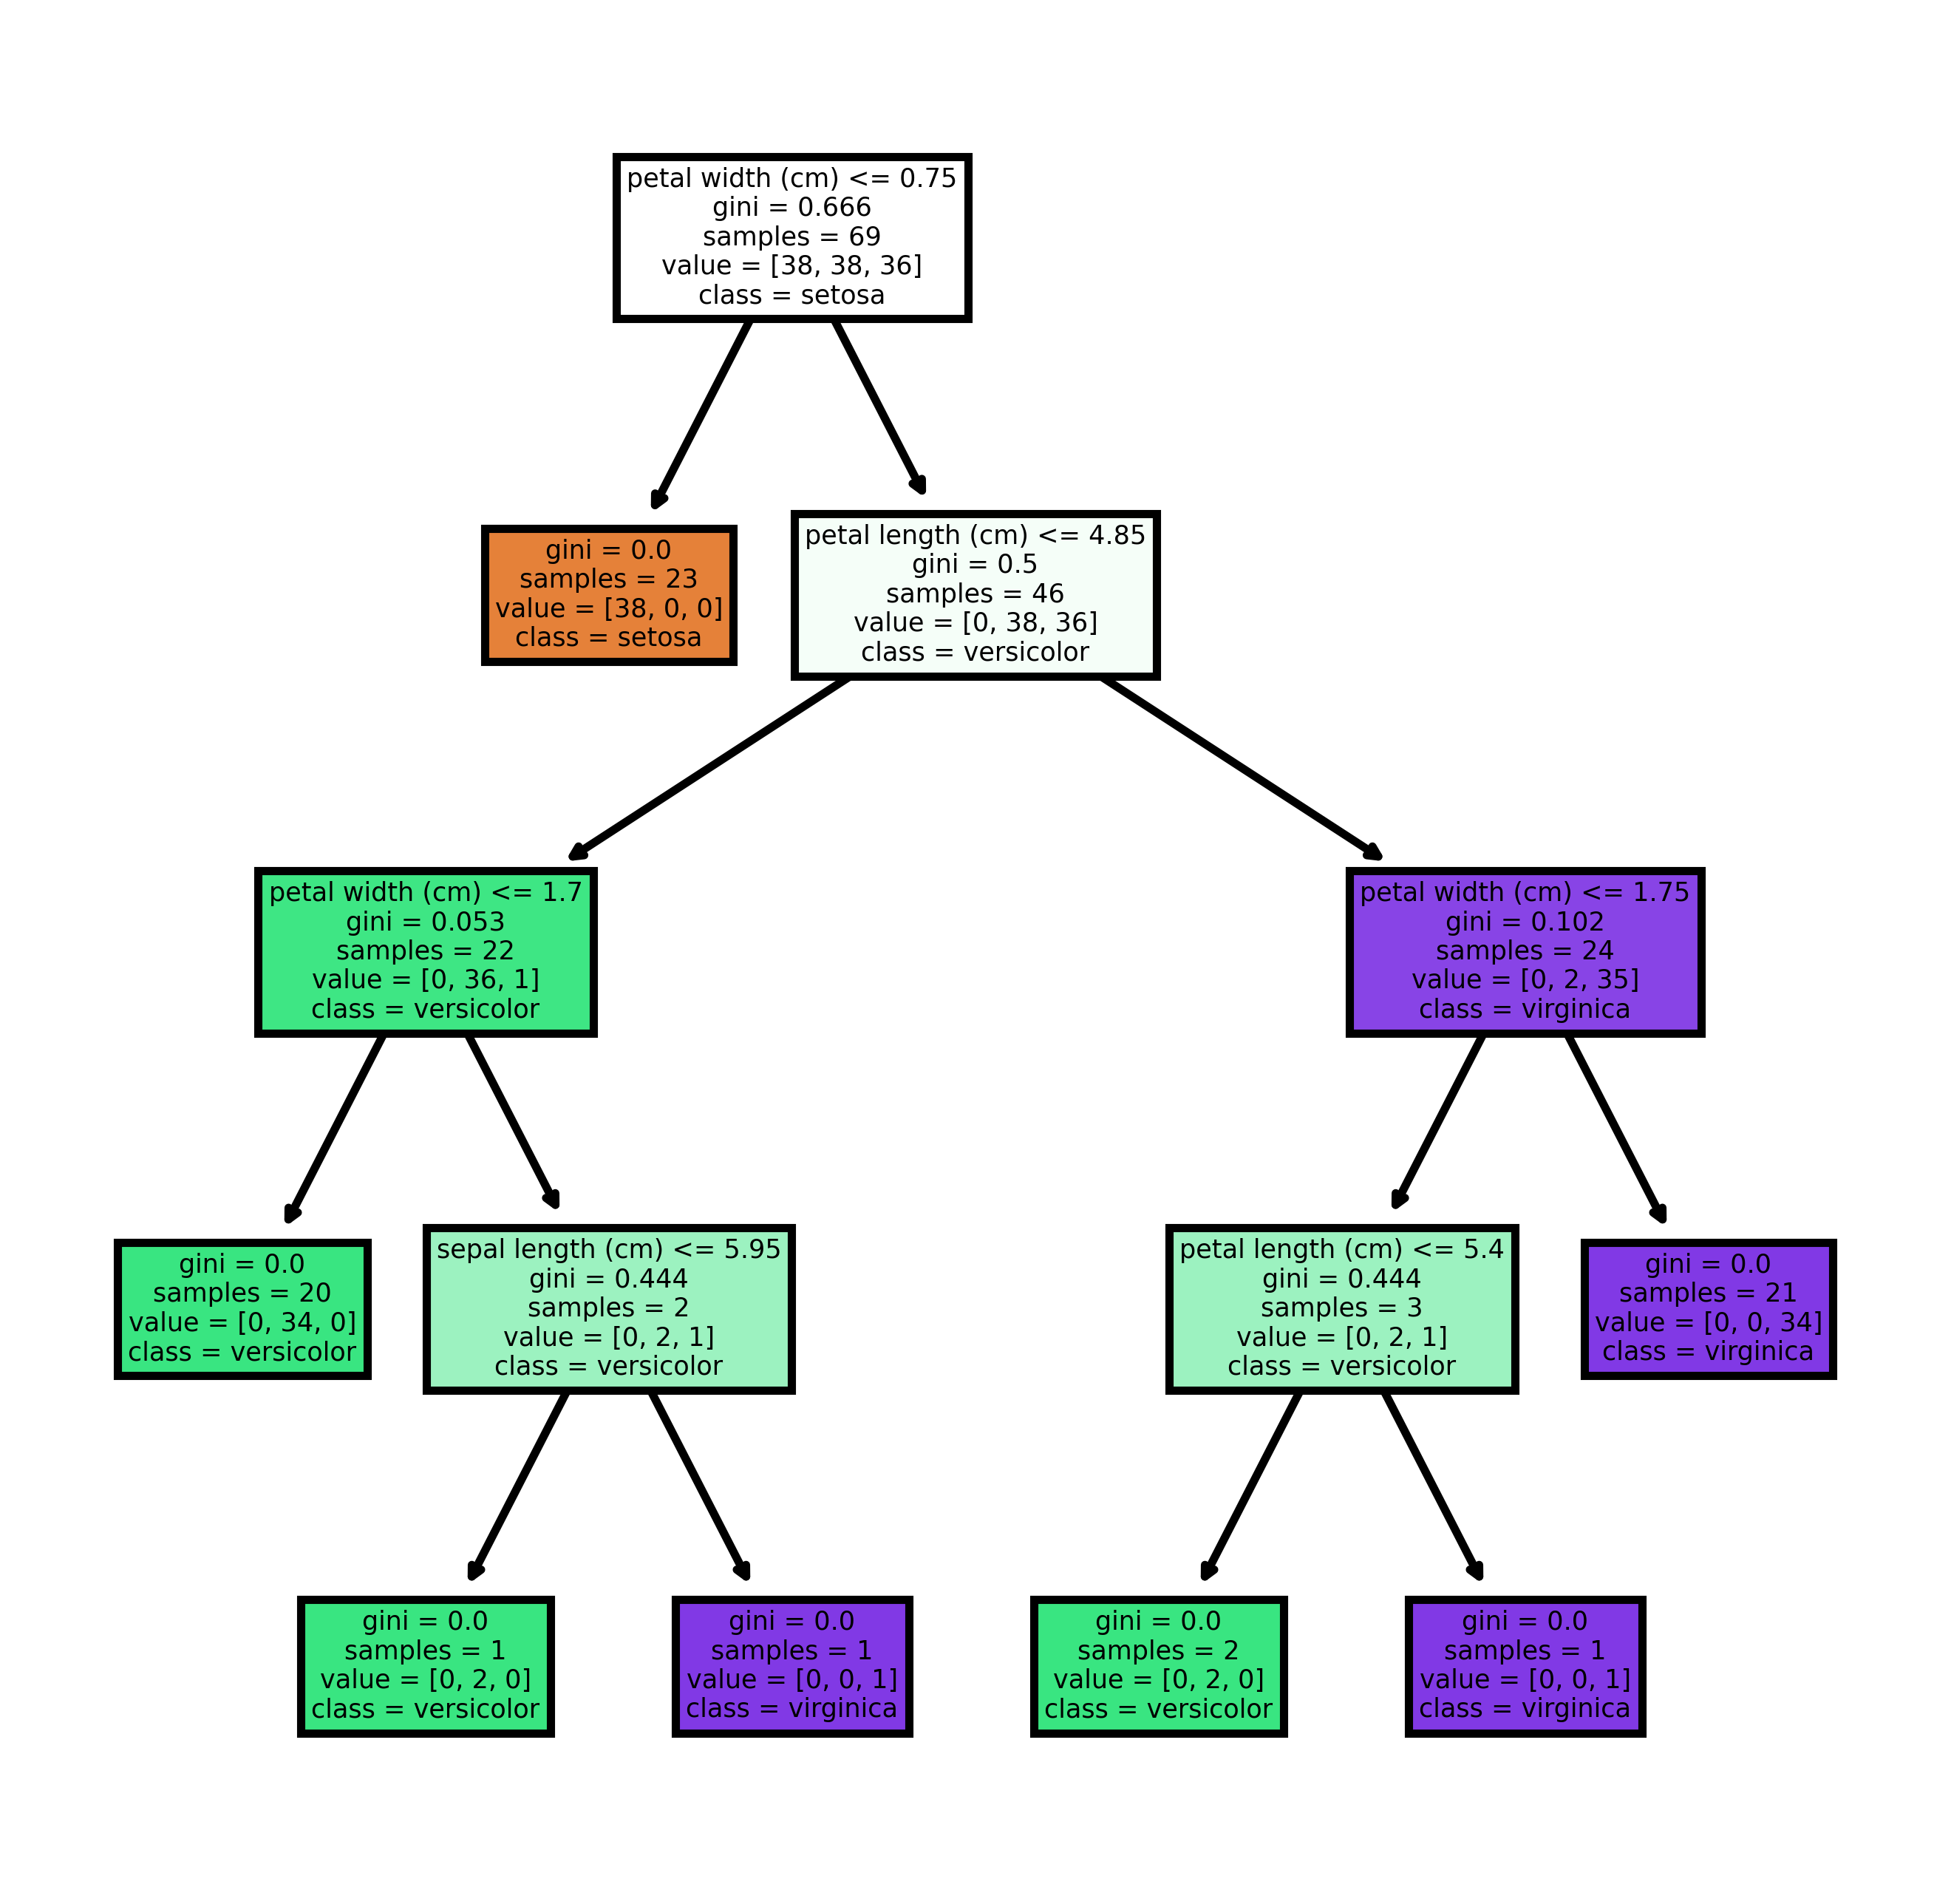

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=800)
tree.plot_tree(btc.estimators_[0], 
               feature_names = iris.feature_names, 
               class_names = iris.target_names, 
               filled = True);

Decision tree for **Random Forest** Classifier.

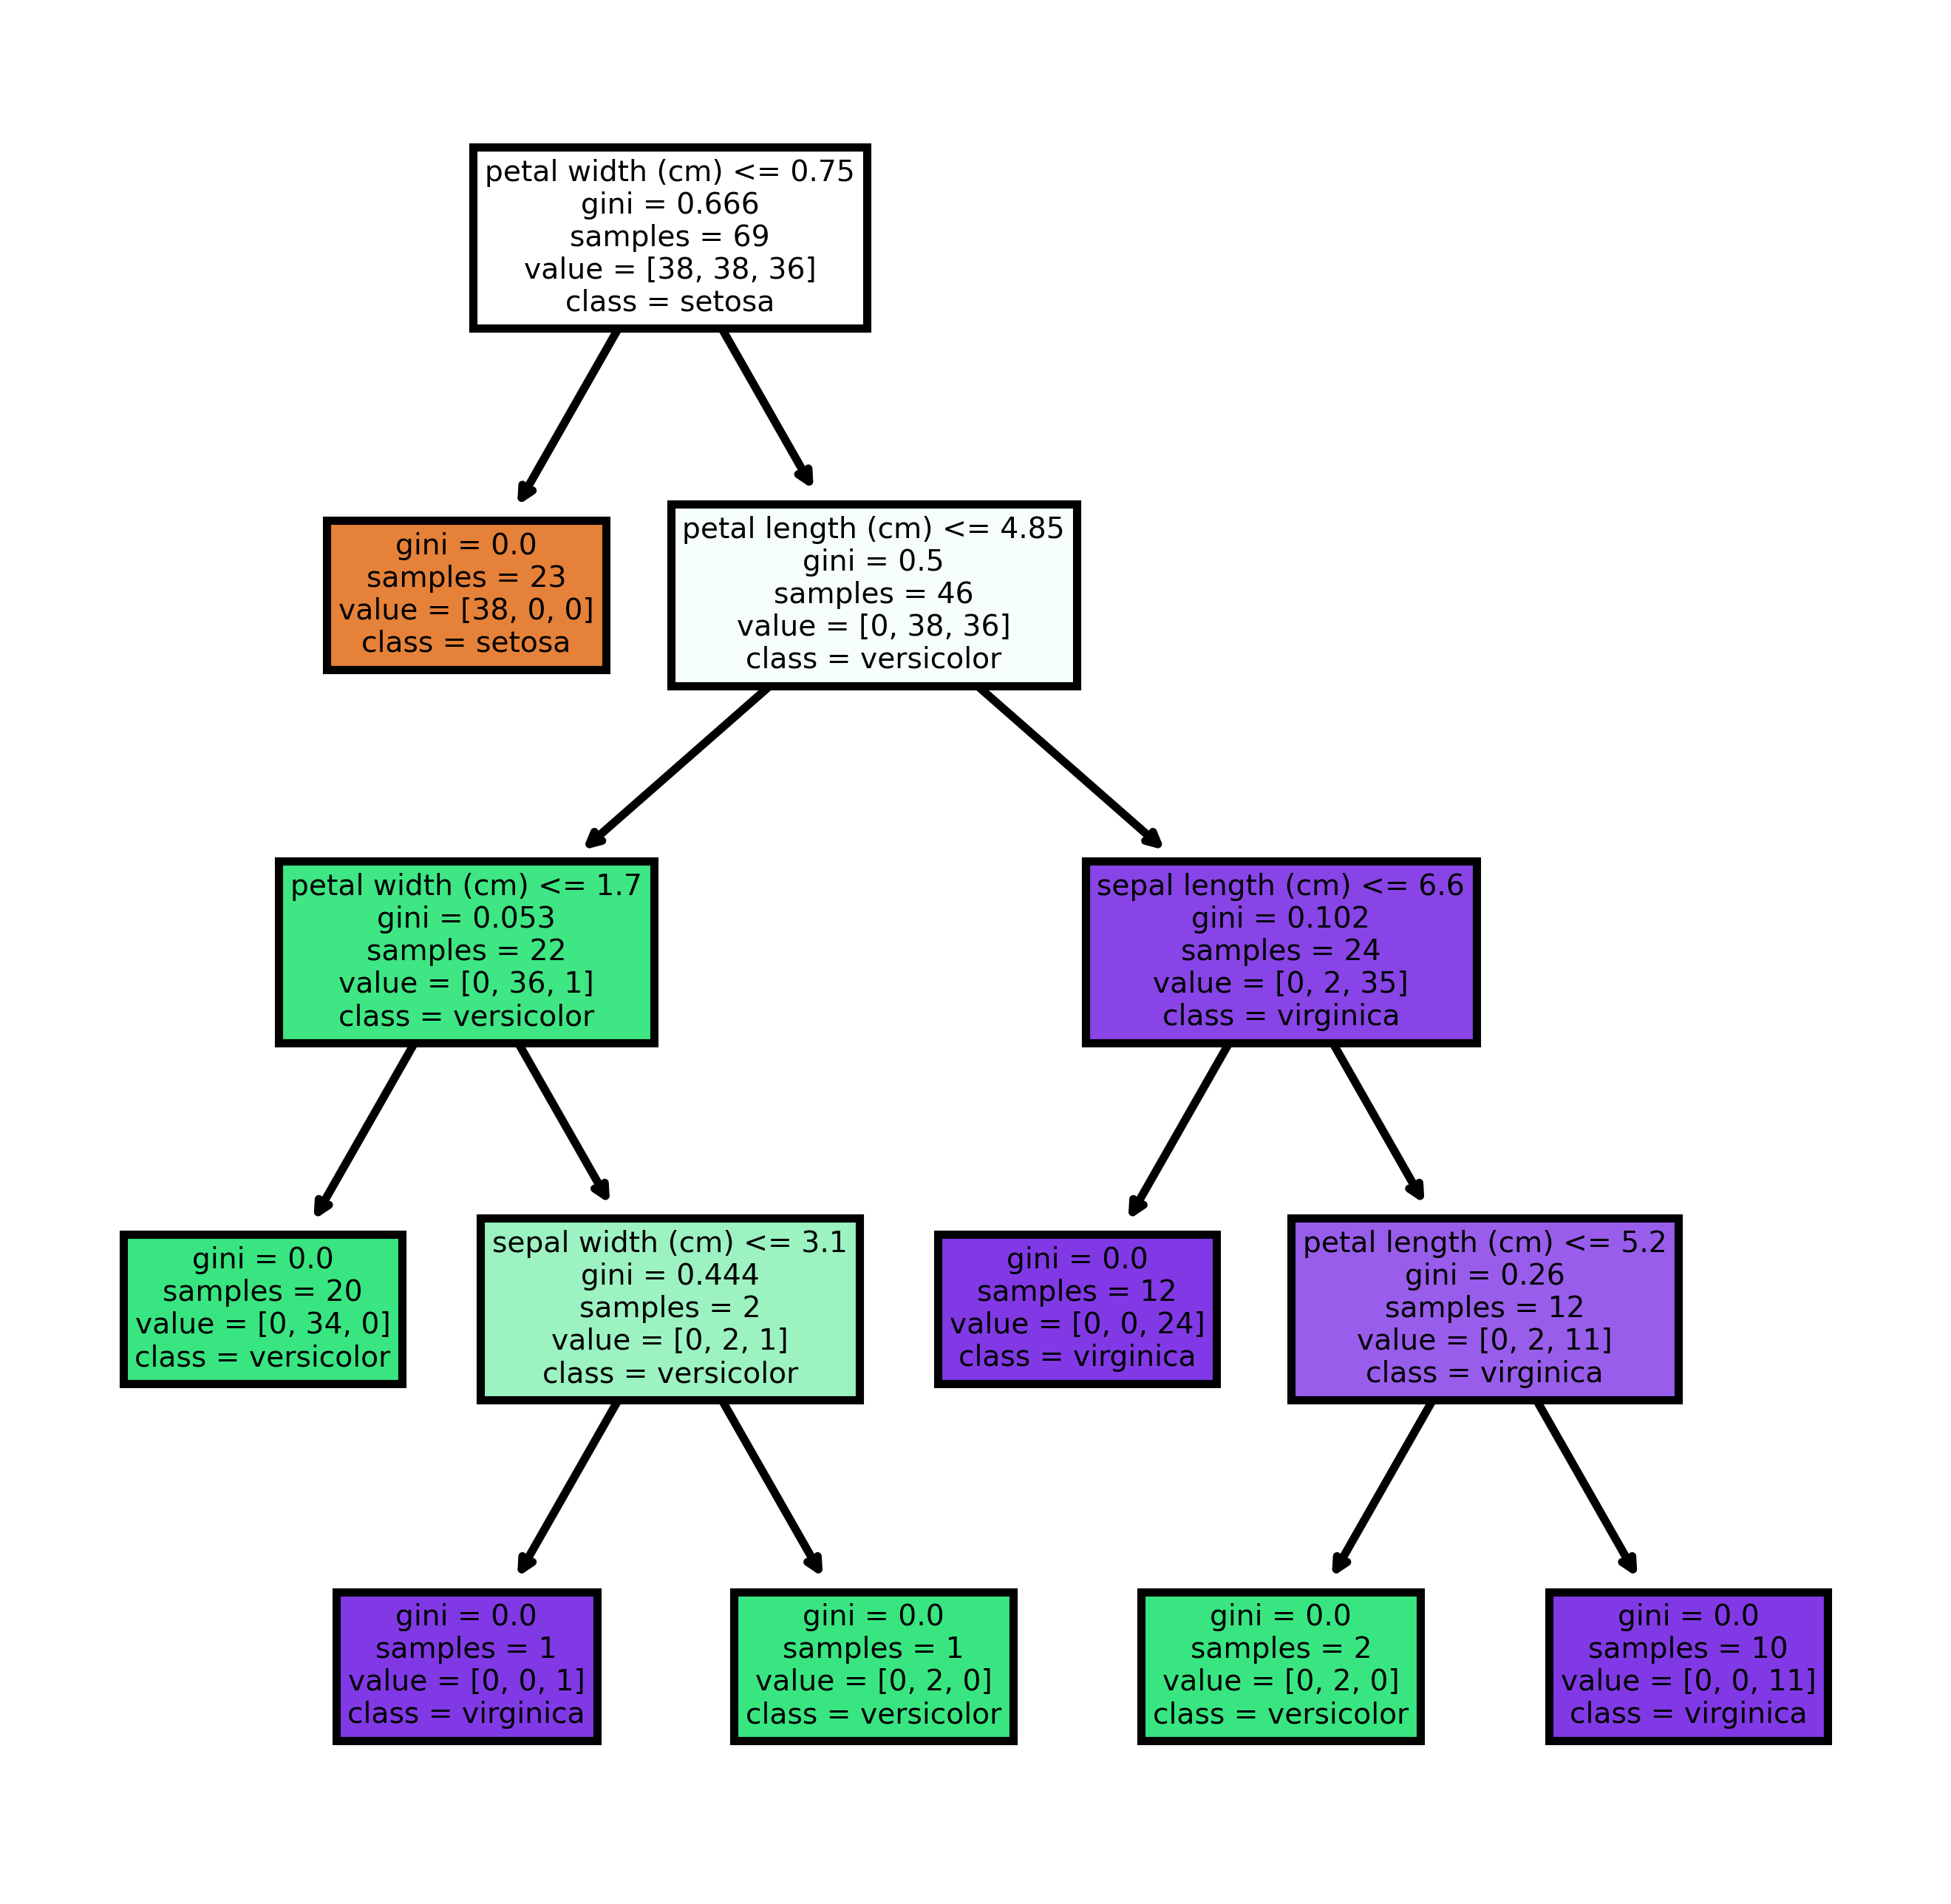

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=800)
tree.plot_tree(rfc.estimators_[0], 
               feature_names = iris.feature_names, 
               class_names = iris.target_names, 
               filled = True);

**Feature Importance**

**Random Forest** gives important feature **metrics**.

In [14]:
importance = pd.DataFrame({'Feature' : X_train.columns, 
                           'Importance %' : np.round(rfc.feature_importances_*100, 2)})
importance.sort_values('Importance %', ascending = False).reset_index(drop=True)

,Feature,Importance %
0,petal width (cm),47.14
1,petal length (cm),36.01
2,sepal length (cm),12.98
3,sepal width (cm),3.87
